### Carregamento das libs

In [1]:
from src.libs.lib import *
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Hash numérica de 5 dígitos: 94799


# salesforce

In [2]:
# salesforce
salesforce = pd.read_excel("src/data/relatorio_falcon_salesforce.xlsx")

# Excluir as linhas onde "Cliente" é "Transportadora Teste Salesforce"
salesforce = salesforce[salesforce['Cliente'] != 'Transportadora Teste Salesforce']

# Excluir as colunas especificadas
colunas_para_excluir = ['Contrato PX (qtde)', 'Atividade (qtde)', 'Unnamed: 1', 'Origem','Cliente','Saída','Contrato PX: Data de criação','Data de criação','Data','Contrato PX: Nº Contrato PX']
salesforce = salesforce.drop(columns=colunas_para_excluir, errors='ignore')

salesforce = salesforce.rename(columns={'ID Torre': 'freight_id',
                                        'Data e hora de conclusão': 'dh_falcon',
                                        'Status':'freight_status',
                                        'UF': 'uf',
                                        'Tipo': 'de_type',
                                        'Motorista': 'encontrou_motorista',
                                        "Assunto": "atividade_falcon",
                                        "Criado por" : 'criado_por'})

salesforce['dh_falcon'] = pd.to_datetime(salesforce['dh_falcon'], format='%d/%m/%Y %H:%M')
salesforce = salesforce.sort_values(by=['freight_id', "dh_falcon"])

salesforce['encontrou_motorista'] = salesforce['encontrou_motorista'].apply(lambda x: 'nao' if pd.isna(x) else 'sim')

salesforce = salesforce.dropna(subset=['freight_id'])
salesforce['freight_id'] = salesforce['freight_id'].astype(int)

salesforce.head()
#5.5s

,criado_por,freight_id,freight_status,de_type,uf,encontrou_motorista,dh_falcon,atividade_falcon
17728,Aldemar Lisboa,338,Finalizada,Diária,SC,sim,2025-05-06 08:50:00,Envio de Whatsapp ativo Envio início de conversa
26573,Josevando Souza,1858,Finalizada,Diária,PR,sim,2025-04-23 13:44:00,Envio de Whatsapp ativo Envio início de conversa
26574,Josevando Souza,1858,Finalizada,Diária,PR,sim,2025-04-23 14:45:00,Envio de Whatsapp ativo Envio início de conversa
4262,Josevando Souza,2402,Finalizada,Diária,SP,sim,2025-04-14 15:38:00,Envio de Whatsapp ativo Envio início de conversa
4263,Josevando Souza,2402,Finalizada,Diária,SP,sim,2025-04-14 17:10:00,Envio de Whatsapp ativo Envio início de conversa


In [3]:
salesforce.atividade_falcon.value_counts()

atividade_falcon
Envio de Whatsapp ativo Oferta contrato curtas                                           40319
Envio de Whatsapp ativo Ofertas contrato longas                                          15407
Envio de Whatsapp ativo Oferta FollowUp                                                   3010
Envio de Whatsapp ativo Envio início de conversa                                           900
Envio de Whatsapp ativo ofertas contrato com bonus                                         654
                                                                                         ...  
Você ligou para DEYWID WYLLYAN TEIXEIRA em quarta-feira, 23 de abril de 2025                 1
Você ligou para JOSE HILDERLANDIO OLIVEIRA FERREIRA em sexta-feira, 2 de maio de 2025        1
Você ligou para JOAO PAULO DE ANDRADE em sexta-feira, 2 de maio de 2025                      1
MISAEL FARIA DE MELO recusou sua chamada em segunda-feira, 5 de maio de 2025                 1
BRUNO ALVES DE SOUZA recusou sua 

In [4]:

def classificar_atividade(texto):
    texto = str(texto).lower()  # transforma em string minúscula para facilitar
    if 'whatsapp' in texto:
        return 'envio_whatsapp'
    elif 'ligou para' in texto:
        return 'chamada_realizada'
    elif 'recusou' in texto:
        return 'chamada_recusada'
    else:
        return 'outros'

# 3. Aplicar a função na nova coluna
salesforce['atividade_realizada'] = salesforce['atividade_falcon'].apply(classificar_atividade)

salesforce.atividade_realizada.value_counts()


atividade_realizada
envio_whatsapp       60601
chamada_realizada      150
chamada_recusada       133
outros                  49
Name: count, dtype: int64

In [5]:
salesforce.loc[salesforce.atividade_realizada == 'outros']


,criado_por,freight_id,freight_status,de_type,uf,encontrou_motorista,dh_falcon,atividade_falcon,atividade_realizada
42733,Aron Biavatti,124925,Cancelada,Diária,SP,nao,2025-01-24 11:01:00,Verificar se contrato teve motoristas associad...,outros
2932,Lilian Leodoro,138699,Finalizada,Ajudante,SP,sim,2025-01-30 14:05:00,Outros,outros
19796,Lilian Leodoro,145481,Finalizada,Ajudante,SC,sim,NaT,Outros,outros
59536,João Souza,150291,Aguardando,Coleta/Entrega,SC,nao,NaT,Não há candidatos num raio de 100km,outros
59643,Bianca Araujo,150291,Aguardando,Coleta/Entrega,SC,nao,NaT,campanha solicitado,outros
40574,Bianca Araujo,150730,Cancelada,Coleta/Entrega,GO,nao,NaT,alterar tipo de veiculo,outros
56603,Bianca Araujo,150873,Cancelada,Diária,SC,nao,NaT,Tipo de contrato,outros
56604,Bianca Araujo,150874,Cancelada,Diária,SC,nao,NaT,Alterar tipo de contrato,outros
56619,Bianca Araujo,150875,Cancelada,Diária,SC,nao,NaT,Alterar tipo de contrato,outros
40557,Bianca Araujo,150950,Cancelada,Coleta/Entrega,GO,nao,NaT,alterar tipo de veiculo,outros


In [6]:
# Fazer a contagem de atividades por freight_id
contagem_atividade_realizada = salesforce.pivot_table(
    index='freight_id',
    columns='atividade_realizada',
    values='atividade_falcon',  # qualquer coluna só para contar
    aggfunc='count',
    fill_value=0
).reset_index()

# Organizar a ordem das colunas (caso queira garantir a ordem correta)
contagem_atividade_realizada = contagem_atividade_realizada[['freight_id', 'envio_whatsapp', 'chamada_realizada', 'chamada_recusada', 'outros']]
contagem_atividade_realizada.head()

atividade_realizada,freight_id,envio_whatsapp,chamada_realizada,chamada_recusada,outros
0,338,1,0,0,0
1,1858,2,0,0,0
2,2402,3,0,0,0
3,3078,1,0,0,0
4,4771,1,0,0,0


In [7]:
# salesforce_resumo
salesforce_resumo = salesforce.groupby(['freight_id', 'encontrou_motorista']).agg(
    qt_atividades_falcon=('dh_falcon', 'count'),
    first_atividade_falcon=('dh_falcon', 'min'),
    last_atividade_falcon=('dh_falcon', 'max'),
).reset_index()

salesforce_resumo['first_atividade_falcon'] = pd.to_datetime(salesforce_resumo['first_atividade_falcon'])
salesforce_resumo['last_atividade_falcon'] = pd.to_datetime(salesforce_resumo['last_atividade_falcon'])

salesforce_resumo['qt_horas_falcon'] = (salesforce_resumo['last_atividade_falcon'] - salesforce_resumo['first_atividade_falcon']).dt.total_seconds() / 60
salesforce_resumo.head()

,freight_id,encontrou_motorista,qt_atividades_falcon,first_atividade_falcon,last_atividade_falcon,qt_horas_falcon
0,338,sim,1,2025-05-06 08:50:00,2025-05-06 08:50:00,0.0
1,1858,sim,2,2025-04-23 13:44:00,2025-04-23 14:45:00,61.0
2,2402,sim,3,2025-04-14 15:38:00,2025-05-02 16:35:00,25977.0
3,3078,sim,1,2025-04-17 12:06:00,2025-04-17 12:06:00,0.0
4,4771,sim,1,2025-04-15 15:25:00,2025-04-15 15:25:00,0.0


In [8]:
print(salesforce_resumo.first_atividade_falcon.min())
print(salesforce_resumo.first_atividade_falcon.max())

2024-12-18 09:14:00
2025-05-06 10:40:00


In [9]:

salesforce_contagens = contagem_atividade_realizada.merge(
    salesforce_resumo,   # ou o nome que você deu para a tabela de contagens
    on='freight_id', 
    how='left'
)

salesforce_contagens = salesforce_contagens[['freight_id', 'envio_whatsapp', 'chamada_realizada', 'chamada_recusada',
       'outros', 'encontrou_motorista', 'qt_atividades_falcon', 'qt_horas_falcon']]
salesforce_contagens.head()

,freight_id,envio_whatsapp,chamada_realizada,chamada_recusada,outros,encontrou_motorista,qt_atividades_falcon,qt_horas_falcon
0,338,1,0,0,0,sim,1,0.0
1,1858,2,0,0,0,sim,2,61.0
2,2402,3,0,0,0,sim,3,25977.0
3,3078,1,0,0,0,sim,1,0.0
4,4771,1,0,0,0,sim,1,0.0


In [10]:
df = salesforce_contagens.copy()

# --------------------------------------------
# 1. Remover outliers usando IQR com multiplicador 2
# --------------------------------------------
q1 = df['qt_horas_falcon'].quantile(0.25)
q3 = df['qt_horas_falcon'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 2.5 * iqr

# Filtrar apenas os contratos com tempo dentro do limite
df_iqr = df[df['qt_horas_falcon'] <= limite_superior].copy()

# --------------------------------------------
# 2. Indicadores gerais pós-filtragem
# --------------------------------------------
total_contratos = len(df_iqr)
total_removidos = len(df) - total_contratos
porcentagem_sucesso = (df_iqr['encontrou_motorista'] == 'sim').mean() * 100
tempo_medio = df_iqr['qt_horas_falcon'].mean()
tempo_mediano = df_iqr['qt_horas_falcon'].median()
tempo_maximo = df_iqr['qt_horas_falcon'].max()

# --------------------------------------------
# 3. Estatísticas médias das atividades
# --------------------------------------------
medias_atividades = df_iqr[['envio_whatsapp', 'chamada_realizada', 'chamada_recusada', 'outros', 'qt_atividades_falcon']].mean()

# --------------------------------------------
# 4. Exibir os resultados
# --------------------------------------------
print("📦 Remoção de Outliers (IQR × 2):")
print(f"- Limite superior aplicado: {limite_superior:.1f} horas")
print(f"- Contratos restantes: {total_contratos}")
print(f"- Contratos removidos como outliers: {total_removidos}\n")
print(f"- % com motorista encontrado: {porcentagem_sucesso:.1f}%\n")
print(f"- Tempo médio investido: {tempo_medio:.1f} h")
print(f"- Tempo mediano investido: {tempo_mediano:.1f} h")
print(f"- Tempo máximo registrado: {tempo_maximo:.1f} h\n")

print("📊 Médias das atividades por contrato:")
for atividade, valor in medias_atividades.items():
    print(f"- {atividade}: {valor:.3f}")

salesforce_final = df_iqr.copy()

📦 Remoção de Outliers (IQR × 2):
- Limite superior aplicado: 22.0 horas
- Contratos restantes: 5817
- Contratos removidos como outliers: 1381

- % com motorista encontrado: 73.2%

- Tempo médio investido: 2.3 h
- Tempo mediano investido: 1.0 h
- Tempo máximo registrado: 22.0 h

📊 Médias das atividades por contrato:
- envio_whatsapp: 6.323
- chamada_realizada: 0.004
- chamada_recusada: 0.005
- outros: 0.003
- qt_atividades_falcon: 6.332


In [11]:
salesforce_para_merge = salesforce_final[['freight_id', 'qt_atividades_falcon','qt_horas_falcon']].copy()

salesforce_para_merge['atuacao_falcon'] = 'sim'

salesforce_para_merge.head()


,freight_id,qt_atividades_falcon,qt_horas_falcon,atuacao_falcon
0,338,1,0.0,sim
3,3078,1,0.0,sim
4,4771,1,0.0,sim
5,4817,1,0.0,sim
6,5261,1,0.0,sim


Quase todos os contratos têm vários envios de WhatsApp (média 7,6).

Pouquíssimos contratos têm chamadas realizadas ou recusadas (médias próximas de 0).

In [12]:
# salesforce_final.to_csv("src/data/salesforce_final.csv")

# contratos

In [13]:
# contratos_original
contratos_original = pd.read_csv("src/data/contratos_original.csv")

contratos_original = contratos_original.loc[contratos_original['de_status'].isin(['Finalizada', 'Cancelada'])]
contratos_original.head()

,freight_id,de_type,de_status,start_at,contract_days,company_id,driver_id,city,uf
0,132327,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,15,3344,286659.0,Rio de Janeiro,RJ
1,131938,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,13,3344,49473.0,Rio de Janeiro,RJ
2,132326,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,13,3344,281613.0,Rio de Janeiro,RJ
3,131959,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,6,3344,141308.0,Rio de Janeiro,RJ
4,132491,Coleta/Entrega,Finalizada,2025-01-01 05:30:00.000,11,1114,177915.0,Santana de Parnaíba,SP


In [14]:
contratos_original.de_status.value_counts()

de_status
Finalizada    22726
Cancelada      5636
Name: count, dtype: int64

In [15]:
contratos_original.loc[contratos_original.contract_days < 0]

contratos_original['foi_finalizada'] = (contratos_original['de_status'] == 'Finalizada').map({True: 'sim', False: 'nao'})
contratos_original['foi_cancelada'] = (contratos_original['de_status'] == 'Cancelada').map({True: 'sim', False: 'nao'})
contratos_original

,freight_id,de_type,de_status,start_at,contract_days,company_id,driver_id,city,uf,foi_finalizada,foi_cancelada
0,132327,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,15,3344,286659.0,Rio de Janeiro,RJ,sim,nao
1,131938,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,13,3344,49473.0,Rio de Janeiro,RJ,sim,nao
2,132326,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,13,3344,281613.0,Rio de Janeiro,RJ,sim,nao
3,131959,Coleta/Entrega,Finalizada,2025-01-01 05:00:00.000,6,3344,141308.0,Rio de Janeiro,RJ,sim,nao
4,132491,Coleta/Entrega,Finalizada,2025-01-01 05:30:00.000,11,1114,177915.0,Santana de Parnaíba,SP,sim,nao
...,...,...,...,...,...,...,...,...,...,...,...
28767,163136,Ajudante,Finalizada,2025-05-04 21:00:00.000,1,3976,208606.0,São Paulo,SP,sim,nao
28768,162718,Ajudante,Finalizada,2025-05-04 21:00:00.000,1,3976,301401.0,São Paulo,SP,sim,nao
28769,163138,Ajudante,Finalizada,2025-05-04 21:00:00.000,1,3976,310745.0,São Paulo,SP,sim,nao
28779,161416,Ajudante,Cancelada,2025-05-05 06:00:00.000,1,808,NaN,Indaiatuba,SP,nao,sim


In [16]:
contratos_original = contratos_original.loc[contratos_original.contract_days > 0]

print(contratos_original.start_at.min())
print(contratos_original.start_at.max())

2025-01-01 05:00:00.000
2025-05-05 06:00:00.000


In [17]:
contratos_original.loc[:, 'mes'] = pd.to_datetime(contratos_original['start_at']).dt.to_period('M').dt.to_timestamp()

contratos_original = contratos_original.loc[(contratos_original.start_at < '2025-05-01')]
contratos_original = contratos_original.sort_values(by=['mes','freight_id'])
contratos_original.head()

/tmp/ipykernel_149451/4163077864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_original.loc[:, 'mes'] = pd.to_datetime(contratos_original['start_at']).dt.to_period('M').dt.to_timestamp()


,freight_id,de_type,de_status,start_at,contract_days,company_id,driver_id,city,uf,foi_finalizada,foi_cancelada,mes
2639,103104,Coleta/Entrega,Cancelada,2025-01-13 07:30:00.000,2,1972,NaN,Pelotas,RS,nao,sim,2025-01-01
1723,121669,Coleta/Entrega,Cancelada,2025-01-08 08:00:00.000,8,3372,NaN,Extrema,MG,nao,sim,2025-01-01
1724,121724,Coleta/Entrega,Cancelada,2025-01-08 08:00:00.000,8,3372,NaN,Extrema,MG,nao,sim,2025-01-01
1725,121726,Coleta/Entrega,Cancelada,2025-01-08 08:00:00.000,8,3372,NaN,Extrema,MG,nao,sim,2025-01-01
15,125571,Coleta/Entrega,Cancelada,2025-01-01 08:00:00.000,3,2940,NaN,Itajaí,SC,nao,sim,2025-01-01


In [18]:
contratos_original = contratos_original.rename(columns={'contract_city': 'city'})

rms_municipios = [
    'São Paulo', 'Arujá', 'Barueri', 'Biritiba Mirim', 'Caieiras', 'Cajamar', 'Carapicuíba',
    'Cotia', 'Diadema', 'Embu das Artes', 'Embu-Guaçu', 'Ferraz de Vasconcelos', 'Francisco Morato',
    'Franco da Rocha', 'Guararema', 'Guarulhos', 'Itapecerica da Serra', 'Itapevi', 'Itaquaquecetuba',
    'Jandira', 'Juquitiba', 'Mairiporã', 'Mauá', 'Mogi das Cruzes', 'Osasco', 'Pirapora do Bom Jesus',
    'Poá', 'Ribeirão Pires', 'Rio Grande da Serra', 'Salesópolis', 'Santa Isabel', 'Santana de Parnaíba',
    'Santo André', 'São Bernardo do Campo', 'São Caetano do Sul', 'São Lourenço da Serra', 'Suzano',
    'Taboão da Serra', 'Vargem Grande Paulista'
]

# Atualizar a coluna 'uf' para 'SP_RM' onde a cidade está na lista da RMSP e a uf for SP
contratos_original['uf2'] = contratos_original.apply(
    lambda row: 'SP_RM' if row['uf'] == 'SP' and row['city'] in rms_municipios else row['uf'],
    axis=1
)

contratos_original.head()

,freight_id,de_type,de_status,start_at,contract_days,company_id,driver_id,city,uf,foi_finalizada,foi_cancelada,mes,uf2
2639,103104,Coleta/Entrega,Cancelada,2025-01-13 07:30:00.000,2,1972,NaN,Pelotas,RS,nao,sim,2025-01-01,RS
1723,121669,Coleta/Entrega,Cancelada,2025-01-08 08:00:00.000,8,3372,NaN,Extrema,MG,nao,sim,2025-01-01,MG
1724,121724,Coleta/Entrega,Cancelada,2025-01-08 08:00:00.000,8,3372,NaN,Extrema,MG,nao,sim,2025-01-01,MG
1725,121726,Coleta/Entrega,Cancelada,2025-01-08 08:00:00.000,8,3372,NaN,Extrema,MG,nao,sim,2025-01-01,MG
15,125571,Coleta/Entrega,Cancelada,2025-01-01 08:00:00.000,3,2940,NaN,Itajaí,SC,nao,sim,2025-01-01,SC


In [19]:
contratos_resumo = contratos_original[['mes','uf', 'uf2', 'foi_finalizada',	'foi_cancelada', 'de_type','freight_id','company_id', 'driver_id', 'contract_days']]
contratos_resumo.head()

,mes,uf,uf2,foi_finalizada,foi_cancelada,de_type,freight_id,company_id,driver_id,contract_days
2639,2025-01-01,RS,RS,nao,sim,Coleta/Entrega,103104,1972,NaN,2
1723,2025-01-01,MG,MG,nao,sim,Coleta/Entrega,121669,3372,NaN,8
1724,2025-01-01,MG,MG,nao,sim,Coleta/Entrega,121724,3372,NaN,8
1725,2025-01-01,MG,MG,nao,sim,Coleta/Entrega,121726,3372,NaN,8
15,2025-01-01,SC,SC,nao,sim,Coleta/Entrega,125571,2940,NaN,3


In [20]:
contratos_original.freight_id.nunique()

28107

# reuniao_crescimento

In [21]:
# reuniao_crescimento
reuniao_crescimento = pd.read_csv("src/data/sequencia_reuniao_crescimento_contrato.csv")
reuniao_crescimento["Data do evento"] = pd.to_datetime(reuniao_crescimento["Data do evento"])
reuniao_crescimento = reuniao_crescimento.rename(columns={"Id contrato": "freight_id"})

reuniao_crescimento.head()

,freight_id,Data do evento,Tipo do evento,Sequência dos eventos
0,57435,2024-01-01 10:31:16,contrato_criado,1
1,57435,2024-01-01 12:10:03,contrato_atendido,2
2,57436,2024-01-01 10:31:27,contrato_criado,1
3,57436,2024-01-01 16:40:10,contrato_atendido,2
4,57437,2024-01-01 10:31:43,contrato_criado,1


In [22]:
reuniao_crescimento['Tipo do evento'].value_counts()

Tipo do evento
contrato_criado           103998
contrato_atendido          90633
contrato_postergado        32310
contrato_expirado          25281
contrato_alterado          21051
cancelado_pelo_cliente     16687
cancelado_internamente      3861
Name: count, dtype: int64

In [23]:
print(reuniao_crescimento[reuniao_crescimento['Tipo do evento'] == 'contrato_criado']['Data do evento'].min())
print(reuniao_crescimento[reuniao_crescimento['Tipo do evento'] == 'contrato_criado']['Data do evento'].max())

2024-01-01 10:31:16
2025-04-30 07:42:23


In [24]:
# Agrupar por contrato e calcular o tempo entre o primeiro e o último evento
duracao_contratos = (
    reuniao_crescimento.groupby("freight_id")["Data do evento"]
    .agg(inicio="min", fim="max")
    .reset_index()
)

# Calcular a duração total em horas e dias
duracao_contratos["duracao_horas"] = ((duracao_contratos["fim"] - duracao_contratos["inicio"]).dt.total_seconds() / 3600).round(1)
duracao_contratos["duracao_dias"] = (duracao_contratos["duracao_horas"] / 24).round(1)

# Exibir as primeiras linhas da tabela de duração
duracao_contratos.head()


,freight_id,inicio,fim,duracao_horas,duracao_dias
0,57435,2024-01-01 10:31:16,2024-01-01 12:10:03,1.6,0.1
1,57436,2024-01-01 10:31:27,2024-01-01 16:40:10,6.1,0.3
2,57437,2024-01-01 10:31:43,2024-01-01 16:13:49,5.7,0.2
3,57438,2024-01-01 10:32:07,2024-01-01 16:40:23,6.1,0.3
4,57439,2024-01-01 10:32:29,2024-01-01 16:13:58,5.7,0.2


In [25]:
estatisticas_gerais = duracao_contratos[["duracao_horas", "duracao_dias"]].describe()
estatisticas_gerais

,duracao_horas,duracao_dias
count,103998.000000,103998.000000
mean,28.100324,1.167243
std,77.079913,3.212957
min,0.000000,0.000000
25%,0.500000,0.000000
50%,4.000000,0.200000
75%,24.900000,1.000000
max,4972.300000,207.200000


In [26]:
# Contar quantas vezes cada tipo de evento ocorreu por contrato
eventos_relevantes = reuniao_crescimento[reuniao_crescimento["Tipo do evento"].isin([
    "contrato_postergado", "contrato_expirado", "contrato_alterado"
])]

contagem_eventos = eventos_relevantes.groupby(["freight_id", "Tipo do evento"])["Tipo do evento"].count().unstack(fill_value=0)

# Juntar com a tabela de duração
resumo_contratos = duracao_contratos.merge(contagem_eventos, how="left", on="freight_id")

# Preencher com 0 os contratos que não tiveram nenhum dos eventos
resumo_contratos.fillna(0, inplace=True)

# Converter colunas de contagem para inteiros
for col in ["contrato_postergado", "contrato_expirado", "contrato_alterado"]:
    if col in resumo_contratos.columns:
        resumo_contratos[col] = resumo_contratos[col].astype(int)

# Exibir a nova estrutura
resumo_reuniao_crescimento = resumo_contratos[['freight_id', 'duracao_horas', 'duracao_dias',
       'contrato_alterado', 'contrato_expirado', 'contrato_postergado']].copy()

resumo_reuniao_crescimento['total_eventos_contrato'] = resumo_reuniao_crescimento['contrato_alterado'] + resumo_reuniao_crescimento['contrato_expirado'] + resumo_reuniao_crescimento['contrato_postergado']

resumo_reuniao_crescimento.head()

,freight_id,duracao_horas,duracao_dias,contrato_alterado,contrato_expirado,contrato_postergado,total_eventos_contrato
0,57435,1.6,0.1,0,0,0,0
1,57436,6.1,0.3,0,0,0,0
2,57437,5.7,0.2,0,0,0,0
3,57438,6.1,0.3,0,0,0,0
4,57439,5.7,0.2,0,0,0,0


In [27]:
resumo_reuniao_crescimento['qt_contrato_alterado'] = resumo_reuniao_crescimento['contrato_alterado']
resumo_reuniao_crescimento['qt_contrato_expirado'] = resumo_reuniao_crescimento['contrato_expirado']
resumo_reuniao_crescimento['qt_contrato_postergado'] = resumo_reuniao_crescimento['contrato_postergado']
resumo_reuniao_crescimento['qt_total_eventos_contrato'] = resumo_reuniao_crescimento['total_eventos_contrato']

cols = ['contrato_alterado', 'contrato_expirado', 'contrato_postergado', 'total_eventos_contrato']
for col in cols:
    resumo_reuniao_crescimento[col] = resumo_reuniao_crescimento[col] != 0
resumo_reuniao_crescimento.head()    

,freight_id,duracao_horas,duracao_dias,contrato_alterado,contrato_expirado,contrato_postergado,total_eventos_contrato,qt_contrato_alterado,qt_contrato_expirado,qt_contrato_postergado,qt_total_eventos_contrato
0,57435,1.6,0.1,False,False,False,False,0,0,0,0
1,57436,6.1,0.3,False,False,False,False,0,0,0,0
2,57437,5.7,0.2,False,False,False,False,0,0,0,0
3,57438,6.1,0.3,False,False,False,False,0,0,0,0
4,57439,5.7,0.2,False,False,False,False,0,0,0,0


In [28]:
resumo_reuniao_crescimento.describe()

,freight_id,duracao_horas,duracao_dias,qt_contrato_alterado,qt_contrato_expirado,qt_contrato_postergado,qt_total_eventos_contrato
count,103998.000000,103998.000000,103998.000000,103998.000000,103998.000000,103998.000000,103998.000000
mean,109697.479519,28.100324,1.167243,0.202417,0.243091,0.310679,0.756188
std,30164.923915,77.079913,3.212957,0.674902,0.649013,0.883483,1.908087
min,57435.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83642.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,109737.500000,4.000000,0.200000,0.000000,0.000000,0.000000,0.000000
75%,135831.750000,24.900000,1.000000,0.000000,0.000000,0.000000,1.000000
max,161870.000000,4972.300000,207.200000,26.000000,26.000000,28.000000,55.000000


<Axes: >

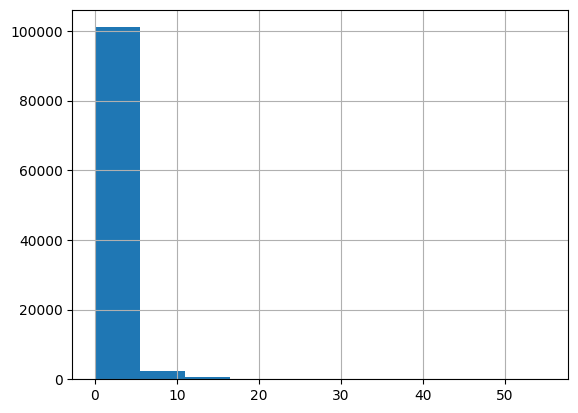

In [29]:
resumo_reuniao_crescimento.qt_total_eventos_contrato.hist()

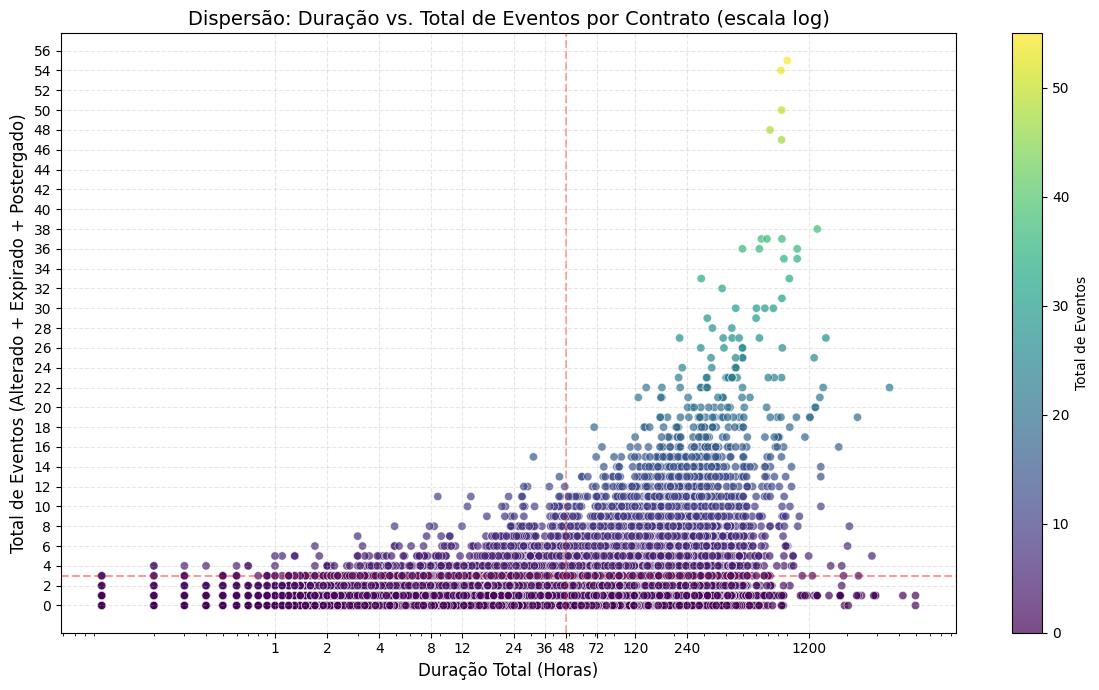

In [30]:
# Ticks legíveis para eixo X em horas (log)
ticks_horas = [1, 2, 4, 8, 12, 24, 36, 48, 72, 120,  240, 1200]
labels_horas = [str(h) for h in ticks_horas]

max_y = resumo_reuniao_crescimento['qt_total_eventos_contrato'].max()
ticks_y = np.arange(0, max_y + 2, 2)

# Recriar o gráfico com ticks personalizados
plt.figure(figsize=(12, 7))

scatter = plt.scatter(
    resumo_reuniao_crescimento['duracao_horas'],
    resumo_reuniao_crescimento['qt_total_eventos_contrato'],
    c=resumo_reuniao_crescimento['qt_total_eventos_contrato'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)

plt.xscale('log')
plt.xticks(ticks_horas, labels_horas)
plt.yticks(ticks_y)

# Linhas de referência
plt.axvline(x=48, color='red', linestyle='--', alpha=0.3)
plt.axhline(y=3, color='red', linestyle='--', alpha=0.4)

# Títulos e eixos
plt.title('Dispersão: Duração vs. Total de Eventos por Contrato (escala log)', fontsize=14)
plt.xlabel('Duração Total (Horas)', fontsize=12)
plt.ylabel('Total de Eventos (Alterado + Expirado + Postergado)', fontsize=12)
plt.colorbar(scatter, label='Total de Eventos')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




Interpretação:
O gráfico utiliza escala logarítmica no eixo X para acomodar a ampla variação de durações.

A linha vertical em 48h (2 dias) marca um ponto operacional importante: acima disso, os contratos tendem a exigir mais atenção.

A linha horizontal em 3 eventos indica um possível limiar de complexidade operacional.

# qt_candidaturas_selcionados

In [31]:
# contratos_original
qt_candidaturas_selecionados = pd.read_csv("src/data/qt_candidaturas_selecionados.csv")
qt_candidaturas_selecionados.head()

,freight_id,qt_candidaturas,qt_selecionados,houve_candidatura
0,129976,3,1,sim
1,44127,3,2,sim
2,26264,1,1,sim
3,121393,0,0,não
4,86580,0,1,não


In [32]:
qt_candidaturas_selecionados.houve_candidatura.value_counts()

houve_candidatura
sim    137104
não     25572
Name: count, dtype: int64

# base_avaliacao_uf

In [33]:
base_avaliacao_uf0 = contratos_resumo.merge(resumo_reuniao_crescimento, on=['freight_id'], how='inner')

base_avaliacao_uf1 = base_avaliacao_uf0.merge(qt_candidaturas_selecionados, on=['freight_id'], how='inner')

base_avaliacao_uf = base_avaliacao_uf1.merge(salesforce_para_merge, on=['freight_id'], how='left')
base_avaliacao_uf['atuacao_falcon'] = base_avaliacao_uf['atuacao_falcon'].fillna('nao')
base_avaliacao_uf[['qt_atividades_falcon', 'qt_horas_falcon']] = base_avaliacao_uf[
    ['qt_atividades_falcon', 'qt_horas_falcon']].fillna(0).astype(int)

base_avaliacao_uf = base_avaliacao_uf.rename(columns={
    'duracao_horas': 'janela_eventos_horas',
    'duracao_dias': 'janela_duracao_dia'
})

base_avaliacao_uf = base_avaliacao_uf.drop(columns=[
    'contrato_alterado', 'contrato_expirado', 'contrato_postergado', 'total_eventos_contrato'
])
base_avaliacao_uf = base_avaliacao_uf[['mes', 'uf', 'uf2', 'de_type','foi_finalizada','foi_cancelada', 'atuacao_falcon', 'freight_id', 'company_id', 'driver_id',
       'contract_days', 'janela_eventos_horas',
       'janela_duracao_dia', 'qt_contrato_alterado', 'qt_contrato_expirado',
       'qt_contrato_postergado', 'qt_total_eventos_contrato',
       'houve_candidatura','qt_candidaturas', 'qt_selecionados', 'qt_atividades_falcon',
       'qt_horas_falcon']]

base_avaliacao_uf.head()

,mes,uf,uf2,de_type,foi_finalizada,foi_cancelada,atuacao_falcon,freight_id,company_id,driver_id,contract_days,janela_eventos_horas,janela_duracao_dia,qt_contrato_alterado,qt_contrato_expirado,qt_contrato_postergado,qt_total_eventos_contrato,houve_candidatura,qt_candidaturas,qt_selecionados,qt_atividades_falcon,qt_horas_falcon
0,2025-01-01,RS,RS,Coleta/Entrega,nao,sim,sim,103104,1972,NaN,2,3519.5,146.6,2,10,10,22,sim,2,1,1,0
1,2025-01-01,MG,MG,Coleta/Entrega,nao,sim,sim,121669,3372,NaN,8,1413.8,58.9,1,4,5,10,sim,6,1,3,9
2,2025-01-01,MG,MG,Coleta/Entrega,nao,sim,nao,121724,3372,NaN,8,1411.6,58.8,4,4,5,13,sim,8,0,0,0
3,2025-01-01,MG,MG,Coleta/Entrega,nao,sim,nao,121726,3372,NaN,8,1411.6,58.8,4,5,5,14,sim,8,0,0,0
4,2025-01-01,SC,SC,Coleta/Entrega,nao,sim,nao,125571,2940,NaN,3,807.9,33.7,0,0,1,1,sim,2,1,0,0


In [34]:
base_avaliacao_uf.insert(
    loc=4,  
    column='contrato_expirou',
    value=base_avaliacao_uf['qt_contrato_expirado'].apply(lambda x: 'sim' if x > 0 else 'nao'))

base_avaliacao_uf.insert(
    loc=5,  
    column='houve_selecionado',
    value=base_avaliacao_uf['qt_selecionados'].apply(lambda x: 'sim' if x > 0 else 'nao'))

base_avaliacao_uf

,mes,uf,uf2,de_type,contrato_expirou,houve_selecionado,foi_finalizada,foi_cancelada,atuacao_falcon,freight_id,company_id,driver_id,contract_days,janela_eventos_horas,janela_duracao_dia,qt_contrato_alterado,qt_contrato_expirado,qt_contrato_postergado,qt_total_eventos_contrato,houve_candidatura,qt_candidaturas,qt_selecionados,qt_atividades_falcon,qt_horas_falcon
0,2025-01-01,RS,RS,Coleta/Entrega,sim,sim,nao,sim,sim,103104,1972,NaN,2,3519.5,146.6,2,10,10,22,sim,2,1,1,0
1,2025-01-01,MG,MG,Coleta/Entrega,sim,sim,nao,sim,sim,121669,3372,NaN,8,1413.8,58.9,1,4,5,10,sim,6,1,3,9
2,2025-01-01,MG,MG,Coleta/Entrega,sim,nao,nao,sim,nao,121724,3372,NaN,8,1411.6,58.8,4,4,5,13,sim,8,0,0,0
3,2025-01-01,MG,MG,Coleta/Entrega,sim,nao,nao,sim,nao,121726,3372,NaN,8,1411.6,58.8,4,5,5,14,sim,8,0,0,0
4,2025-01-01,SC,SC,Coleta/Entrega,nao,sim,nao,sim,nao,125571,2940,NaN,3,807.9,33.7,0,0,1,1,sim,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28054,2025-04-01,SP,SP_RM,Coleta/Entrega,nao,sim,sim,nao,nao,161861,1202,206196.0,2,9.8,0.4,0,0,0,0,sim,1,2,0,0
28055,2025-04-01,SP,SP_RM,Coleta/Entrega,nao,sim,sim,nao,sim,161862,668,70503.0,2,0.0,0.0,0,0,0,0,sim,1,1,10,1
28056,2025-04-01,GO,GO,Coleta/Entrega,nao,sim,sim,nao,sim,161864,2045,62805.0,1,9.4,0.4,0,0,0,0,sim,1,1,4,0
28057,2025-04-01,MA,MA,Ajudante,nao,nao,nao,sim,nao,161866,1731,NaN,1,1.2,0.0,0,0,0,0,sim,1,0,0,0


# base_analise

In [35]:
base_analise = base_avaliacao_uf.loc[base_avaliacao_uf.mes >= '2025-01-01']

In [36]:
coluna = 'janela_eventos_horas'
q1 = base_analise[coluna].quantile(0.25)
q3 = base_analise[coluna].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar e descrever
base_analise = base_analise[(base_analise[coluna] >= limite_inferior) & (base_analise[coluna] <= limite_superior)]

base_analise.shape, base_analise[coluna].describe()

((24168, 24),
 count    24168.000000
 mean        10.200877
 std         14.101591
 min          0.000000
 25%          0.500000
 50%          2.700000
 75%         17.300000
 max         62.400000
 Name: janela_eventos_horas, dtype: float64)

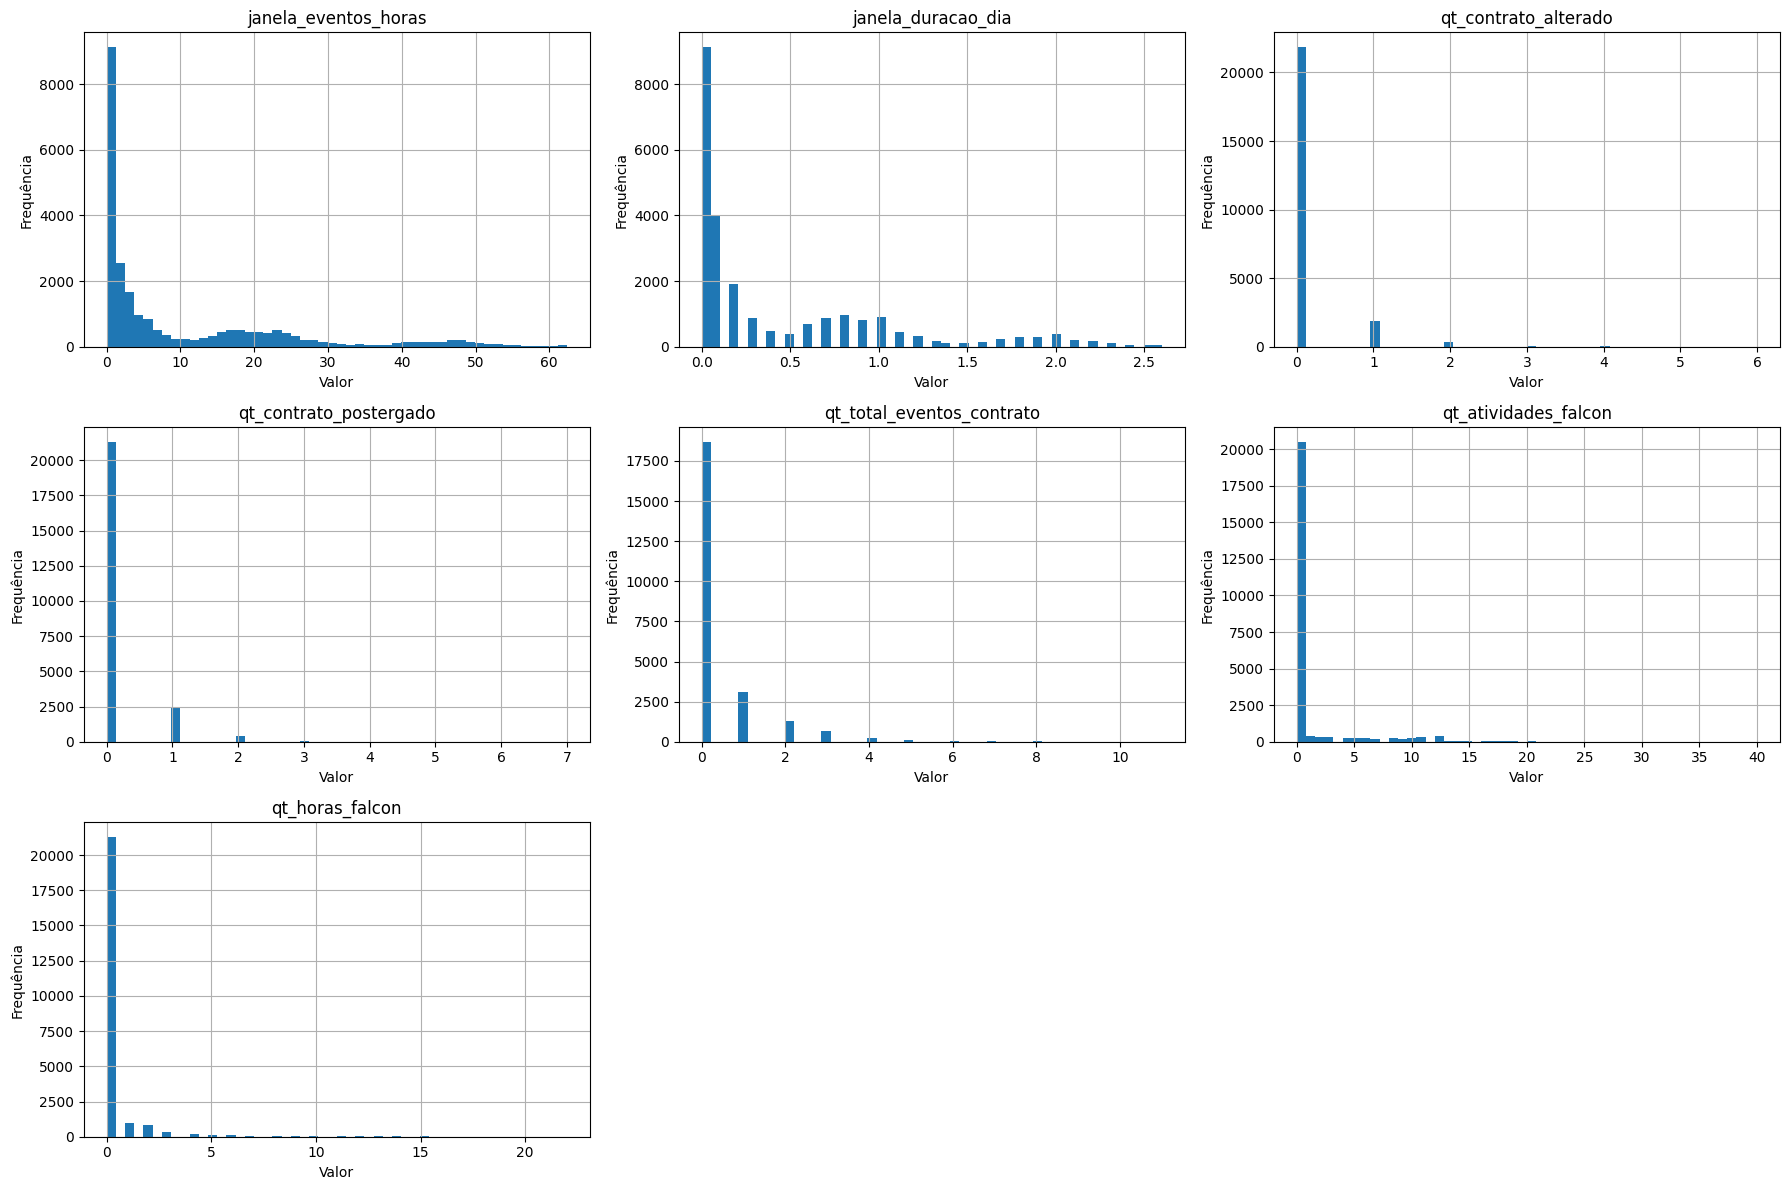

In [37]:


# Colunas numéricas para avaliar
colunas_numericas = [
    'janela_eventos_horas', 'janela_duracao_dia', 'qt_contrato_alterado',
    'qt_contrato_postergado', 'qt_total_eventos_contrato',
    'qt_atividades_falcon', 'qt_horas_falcon'
]

# Criar histogramas lado a lado
n = len(colunas_numericas)
ncols = 3
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(colunas_numericas):
    base_analise[col].dropna().hist(bins=50, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frequência")

# Remover plots vazios se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [38]:

    
base_analise = base_analise[['mes', 'uf', 'uf2', 'de_type', 'houve_candidatura',  'houve_selecionado', 'contrato_expirou',
       'foi_finalizada', 'foi_cancelada', 'atuacao_falcon', 'freight_id', 'driver_id',
        'janela_eventos_horas',
        'qt_contrato_alterado', 
       'qt_contrato_postergado', 'qt_total_eventos_contrato',
        'qt_selecionados',
       'qt_atividades_falcon', 'qt_horas_falcon']]

base_analise.head()

,mes,uf,uf2,de_type,houve_candidatura,houve_selecionado,contrato_expirou,foi_finalizada,foi_cancelada,atuacao_falcon,freight_id,driver_id,janela_eventos_horas,qt_contrato_alterado,qt_contrato_postergado,qt_total_eventos_contrato,qt_selecionados,qt_atividades_falcon,qt_horas_falcon
5,2025-01-01,PR,PR,Diária,sim,nao,nao,nao,sim,nao,125654,NaN,0.2,0,0,0,0,0,0
6,2025-01-01,PR,PR,Diária,sim,nao,nao,nao,sim,nao,125655,NaN,0.2,0,0,0,0,0,0
40,2025-01-01,PR,PR,Ajudante,sim,nao,sim,nao,sim,nao,130400,NaN,46.5,0,3,5,0,0,0
110,2025-01-01,PR,PR,Diária,não,nao,nao,nao,sim,nao,131712,NaN,0.0,0,0,0,0,0,0
113,2025-01-01,SP,SP,Coleta/Entrega,sim,sim,nao,sim,nao,nao,131724,283200.0,9.2,0,0,0,1,0,0


In [39]:
base_analise.to_csv("src/data/df_falcon_analise.csv")